In [ ]:
!pip install numpy
!pip install pandas
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/HACKATHON_TRAINING_DATA.CSV')
df.head()
df.shape

(3494, 139)

In [ ]:
!pip install seaborn
!pip install matpllotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matpllotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matpllotlib.pyplot


# New Section

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

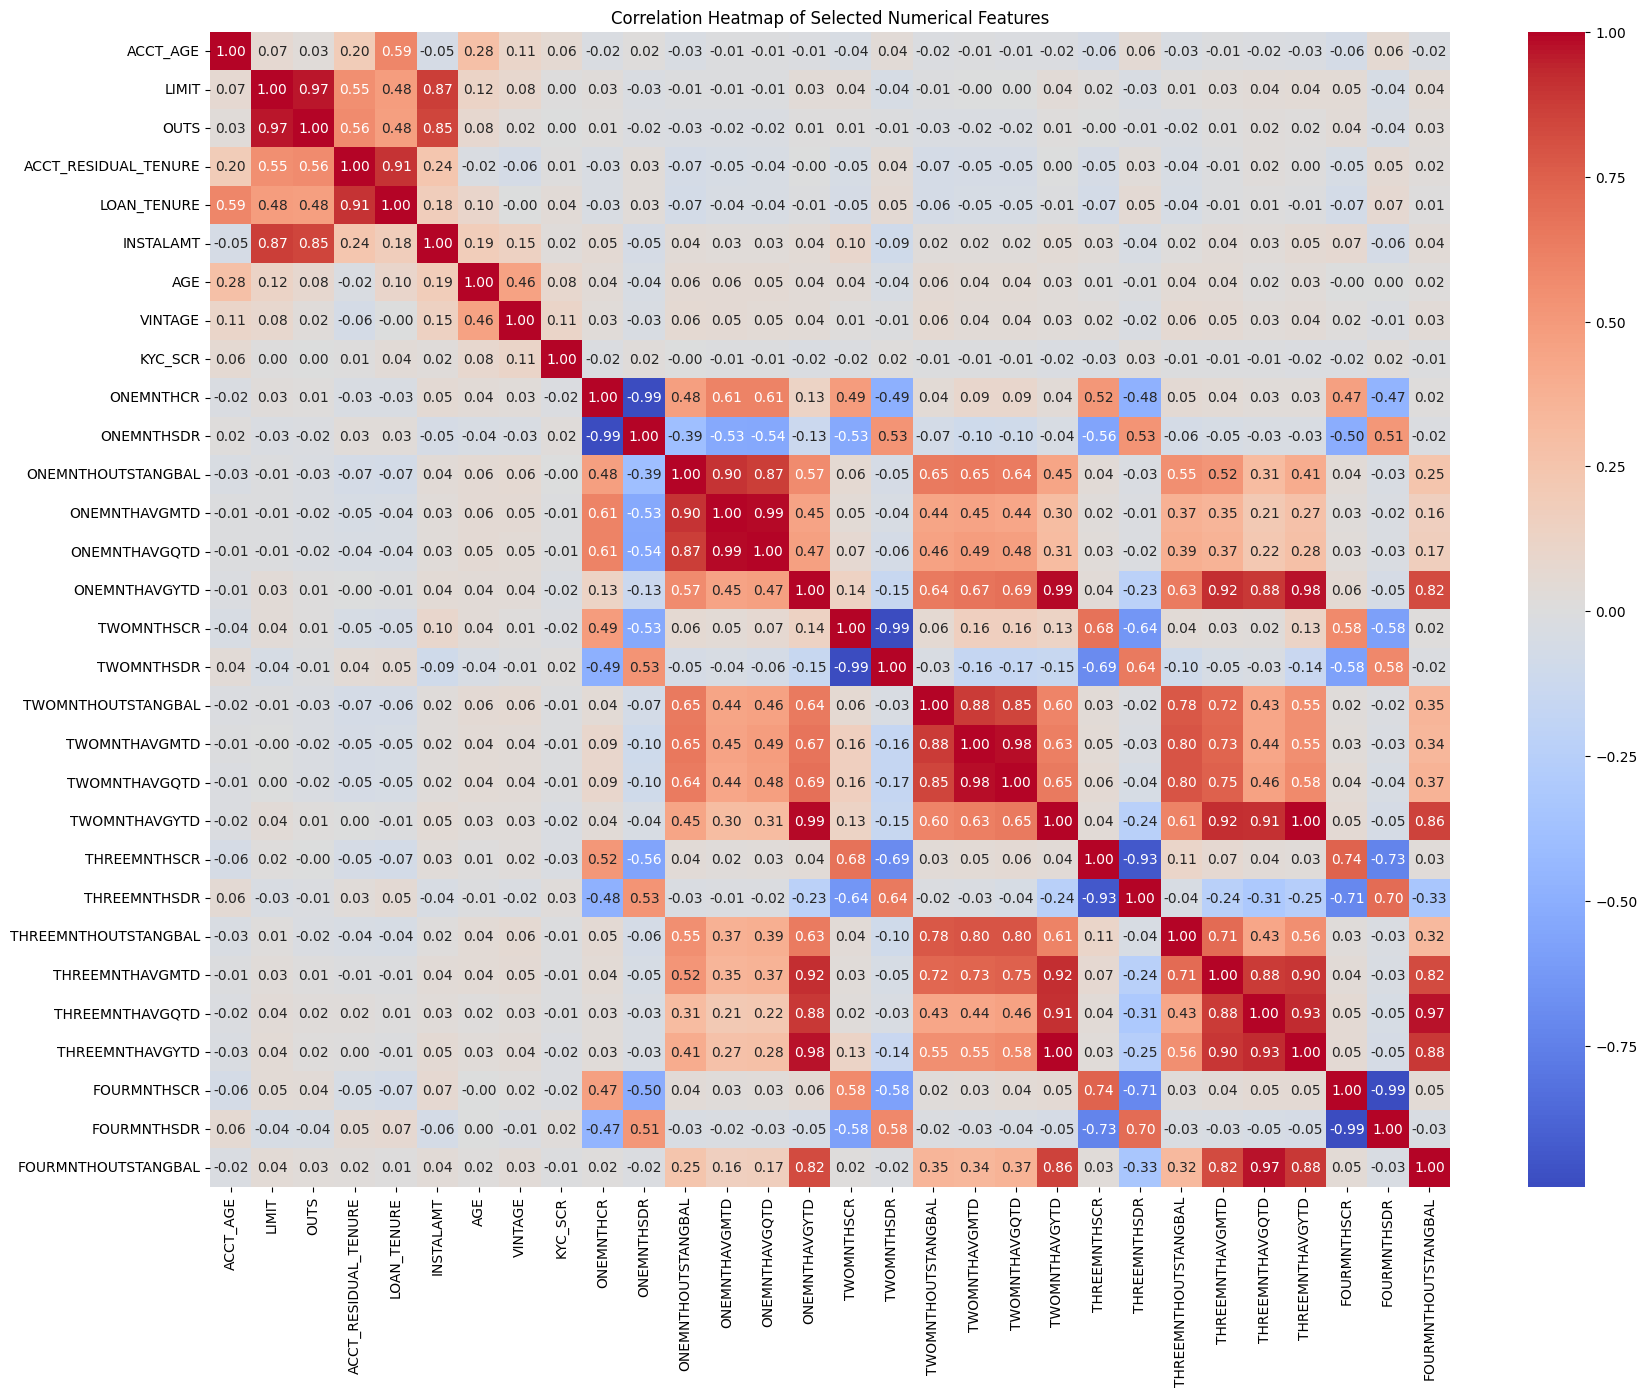

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns[:30]

# Calculate correlation matrix
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()

In [ ]:
object_cols = list(df.select_dtypes(include='object').columns)
object_cols

['SI_FLG',
 'LOCKER_HLDR_IND',
 'UID_FLG',
 'KYC_FLG',
 'INB_FLG',
 'EKYC_FLG',
 'AVERAGE_ACCT_AGE1',
 'CREDIT_HISTORY_LENGTH1',
 'INCOME_BAND1',
 'AGREG_GROUP',
 'PRODUCT_TYPE',
 'TIME_PERIOD']

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
LAST_1_YR_RG4,3201
LAST_3_YR_RG4,2807
CUST_NO_OF_TIMES_NPA,2305
FIRST_NPA_TENURE,2305
LATEST_NPA_TENURE,2305
...,...
SI_FLG,0
EKYC_FLG,0
INB_FLG,0
KYC_FLG,0


In [ ]:
missing_threshold = 0.5 * len(df)
df = df.dropna(thresh=missing_threshold, axis=1)

In [ ]:
df.shape

(3494, 133)

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [ ]:
# Get all categorical column names
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values with mode for each categorical column
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
columns_to_drop = ['SI_FLG', 'AGREG_GROUP', 'TIME_PERIOD']
df = df.drop(columns=columns_to_drop, errors='ignore')



In [ ]:
extracted = df['AVERAGE_ACCT_AGE1'].str.extract(r'(\d+)yrs\s+(\d+)mon')

# Convert to numeric
extracted = extracted.apply(pd.to_numeric)

# Calculate total months
df['AVERAGE_ACCT_AGE1_MONTHS'] = extracted[0] * 12 + extracted[1]

extracted = df['CREDIT_HISTORY_LENGTH1'].str.extract(r'(\d+)yrs\s+(\d+)mon')

# Convert to numeric
extracted = extracted.apply(pd.to_numeric)

# Calculate total months
df['CREDIT_HISTORY_LENGTH1_MONTHS'] = extracted[0] * 12 + extracted[1]

columns_to_drop = ['AVERAGE_ACCT_AGE1', 'CREDIT_HISTORY_LENGTH1']
df = df.drop(columns=columns_to_drop, errors='ignore')



<ipython-input-14-1f889ca3da73>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['AVERAGE_ACCT_AGE1_MONTHS'] = extracted[0] * 12 + extracted[1]
<ipython-input-14-1f889ca3da73>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['CREDIT_HISTORY_LENGTH1_MONTHS'] = extracted[0] * 12 + extracted[1]


In [ ]:
# Columns to average
cols_to_average1 = ['ONEMNTHOUTSTANGBAL', 'ONEMNTHAVGMTD', 'ONEMNTHAVGQTD', 'ONEMNTHAVGYTD']

# Calculate the average row-wise, ignoring NaN values
df['ONEMNTH_AVG'] = df[cols_to_average1].mean(axis=1)
df=df.drop(columns=cols_to_average1,errors='ignore')



# Columns to average
cols_to_average2 = ['TWOMNTHOUTSTANGBAL', 'TWOMNTHAVGMTD', 'TWOMNTHAVGQTD', 'TWOMNTHAVGYTD']

# Calculate the average row-wise, ignoring NaN values
df['TWOMNTH_AVG'] = df[cols_to_average2].mean(axis=1)
df=df.drop(columns=cols_to_average2,errors='ignore')





# Columns to average
cols_to_average3 = ['THREEMNTHOUTSTANGBAL', 'THREEMNTHAVGMTD', 'THREEMNTHAVGQTD', 'THREEMNTHAVGYTD']

# Calculate the average row-wise, ignoring NaN values
df['THREEMNTH_AVG'] = df[cols_to_average3].mean(axis=1)
df=df.drop(columns=cols_to_average3,errors='ignore')





<ipython-input-15-8f6e0439ed02>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ONEMNTH_AVG'] = df[cols_to_average1].mean(axis=1)
<ipython-input-15-8f6e0439ed02>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TWOMNTH_AVG'] = df[cols_to_average2].mean(axis=1)
<ipython-input-15-8f6e0439ed02>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a d

In [ ]:
cols_to_averageCR = ['CRIFF_11', 'CRIFF_22', 'CRIFF_33', 'CRIFF_44','CRIFF_55','CRIFF_66']
df['CRIFF_AVG'] = df[cols_to_averageCR].mean(axis=1)
df=df.drop(columns=cols_to_averageCR,errors='ignore')

<ipython-input-16-05864918a61d>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['CRIFF_AVG'] = df[cols_to_averageCR].mean(axis=1)


In [ ]:
df.shape

(3494, 116)

In [ ]:
X = df.drop(columns=['TARGET'],axis=1)
X.shape

(3494, 115)

In [ ]:
Y = df['TARGET']

In [ ]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

!pip install scikit-learn

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)
X.shape

(3494, 131)

In [ ]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -0.11356123,
        -0.10603172, -0.06292127],
       [ 1.        ,  0.        ,  0.        , ..., -0.98082997,
        -0.10603172,  0.09050725],
       [ 1.        ,  0.        ,  0.        , ..., -0.11356123,
        -0.10603172,  0.01244713],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.11356123,
        -0.10603172, -0.79776316],
       [ 1.        ,  0.        ,  0.        , ..., -0.11760498,
        -0.1093058 ,  0.61808604],
       [ 1.        ,  0.        ,  0.        , ..., -0.14291176,
        -0.1306291 , -0.55550759]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)



In [ ]:
# Update 1: Replace Regressors with Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC  # Changed from SVR
from sklearn.linear_model import LogisticRegression  # Main classification linear model
from sklearn.linear_model import RidgeClassifier  # Alternative linear classifiers
!pip install catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Keep these metrics for classification
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
def evaluate_model(y_true, y_pred, y_proba=None):
    """Evaluates binary classification performance"""
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'Confusion Matrix': confusion_matrix(y_true, y_pred)
    }

    if y_proba is not None:  # Only calculate if probabilities are available
        metrics['AUC-ROC'] = roc_auc_score(y_true, y_proba)

    print(classification_report(y_true, y_pred))
    return metrics

In [ ]:

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "SVC": SVC(probability=True),
    "AdaBoost": AdaBoostClassifier()
}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():
    # Train model
    model.fit(X_train, Y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]  # For AUC-ROC if needed

    # Calculate metrics
    train_acc = accuracy_score(Y_train, y_train_pred)
    test_acc = accuracy_score(Y_test, y_test_pred)
    test_precision = precision_score(Y_test, y_test_pred)
    test_recall = recall_score(Y_test, y_test_pred)
    test_f1 = f1_score(Y_test, y_test_pred)

    # Store results
    model_list.append(model_name)
    accuracy_list.append(test_acc)
    precision_list.append(test_precision)
    recall_list.append(test_recall)
    f1_list.append(test_f1)

    # Print results
    print(f"\n{model_name}")
    print("======================================")
    print("Training Performance:")
    print(f"- Accuracy: {train_acc:.4f}")

    print("\nTest Performance:")
    print(f"- Accuracy: {test_acc:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- F1 Score: {test_f1:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_test_pred))
    print("======================================\n")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Training Performance:
- Accuracy: 0.9231

Test Performance:
- Accuracy: 0.9185
- Precision: 0.0000
- Recall: 0.0000
- F1 Score: 0.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       647
         1.0       0.00      0.00      0.00        52

    accuracy                           0.92       699
   macro avg       0.46      0.50      0.48       699
weighted avg       0.86      0.92      0.89       699



K-Neighbors Classifier
Training Performance:
- Accuracy: 0.9274

Test Performance:
- Accuracy: 0.9242
- Precision: 0.4444
- Recall: 0.0769
- F1 Score: 0.1311

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       647
         1.0       0.44      0.08      0.13        52

    accuracy                           0.92       699
   macro avg       0.69      0.53      0.55       699
weighted avg       0.89      0.92    

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Check class distribution before SMOTE
print("Original class counts:", Counter(Y_train))

# Apply SMOTE to training data
sm = SMOTE(random_state=42, k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

# Check new class distribution
print("Resampled class counts:", Counter(y_train_res))


Original class counts: Counter({0.0: 2564, 1.0: 231})
Resampled class counts: Counter({0.0: 2564, 1.0: 2564})


In [ ]:

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "SVC": SVC(probability=True),
    "AdaBoost": AdaBoostClassifier()
}

model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():
    # Train model
    model.fit(X_train_res, Y_train_res)

    # Make predictions
    y_train_pred = model.predict(X_train_res)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]  # For AUC-ROC if needed

    # Calculate metrics
    train_acc = accuracy_score(Y_train_res, y_train_pred)
    test_acc = accuracy_score(Y_test, y_test_pred)
    test_precision = precision_score(Y_test, y_test_pred)
    test_recall = recall_score(Y_test, y_test_pred)
    test_f1 = f1_score(Y_test, y_test_pred)

    # Store results
    model_list.append(model_name)
    accuracy_list.append(test_acc)
    precision_list.append(test_precision)
    recall_list.append(test_recall)
    f1_list.append(test_f1)

    # Print results
    print(f"\n{model_name}")
    print("======================================")
    print("Training Performance:")
    print(f"- Accuracy: {train_acc:.4f}")

    print("\nTest Performance:")
    print(f"- Accuracy: {test_acc:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- F1 Score: {test_f1:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(Y_test, y_test_pred))
    print("======================================\n")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Training Performance:
- Accuracy: 0.7793

Test Performance:
- Accuracy: 0.7196
- Precision: 0.1505
- Recall: 0.5962
- F1 Score: 0.2403

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83       647
         1.0       0.15      0.60      0.24        52

    accuracy                           0.72       699
   macro avg       0.55      0.66      0.53       699
weighted avg       0.90      0.72      0.78       699



K-Neighbors Classifier
Training Performance:
- Accuracy: 0.8814

Test Performance:
- Accuracy: 0.6295
- Precision: 0.1124
- Recall: 0.5769
- F1 Score: 0.1881

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.63      0.76       647
         1.0       0.11      0.58      0.19        52

    accuracy                           0.63       699
   macro avg       0.53      0.61      0.47       699
weighted avg       0.89      0.63    

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:

model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
]

)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,561 (41.25 KB)

 Trainable params: 10,561 (41.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

In [ ]:
import tensorflow
import datetime
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=model.fit(
    X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9195 - loss: 0.2481 - val_accuracy: 0.9256 - val_loss: 0.2698
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9205 - loss: 0.2265 - val_accuracy: 0.9242 - val_loss: 0.2607
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9145 - loss: 0.2294 - val_accuracy: 0.9256 - val_loss: 0.2605
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9125 - loss: 0.2198 - val_accuracy: 0.9185 - val_loss: 0.2868
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9205 - loss: 0.2303 - val_accuracy: 0.9199 - val_loss: 0.3029
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9351 - loss: 0.1846 - val_accuracy: 0.9113 - val_loss: 0.3294
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9246 - loss: 0.1814 - val_accuracy: 0.9199 - val_loss: 0.3254
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9277 - loss: 0.1722 - val_accuracy: 0.8970 - v